## 

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

Number of unique classes: 10
(784, 54000)


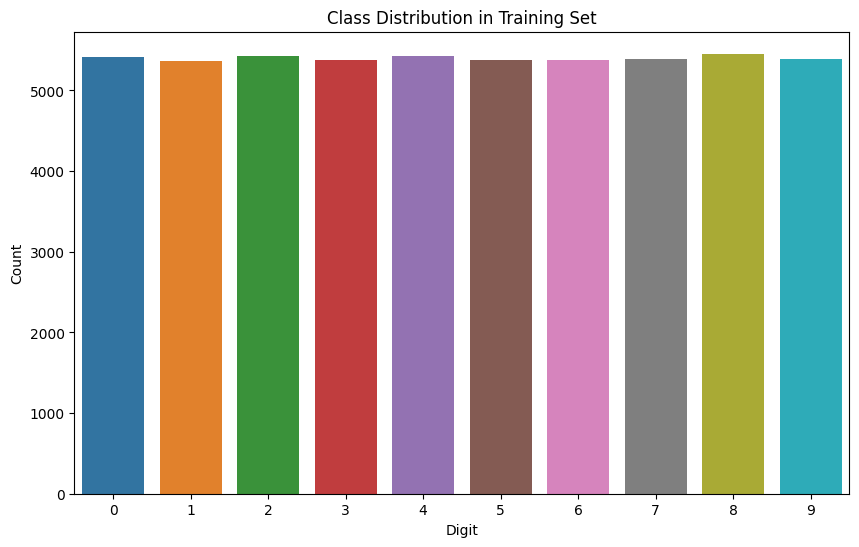

Iteration 0: Train Accuracy = 40.02%, Validation Accuracy = 40.31%
Iteration 10: Train Accuracy = 90.69%, Validation Accuracy = 90.30%
Iteration 20: Train Accuracy = 92.74%, Validation Accuracy = 92.62%
Iteration 30: Train Accuracy = 93.57%, Validation Accuracy = 93.25%
Iteration 40: Train Accuracy = 94.08%, Validation Accuracy = 93.70%
Iteration 50: Train Accuracy = 94.44%, Validation Accuracy = 94.07%
Iteration 60: Train Accuracy = 94.67%, Validation Accuracy = 94.32%
Iteration 70: Train Accuracy = 94.85%, Validation Accuracy = 94.42%
Iteration 80: Train Accuracy = 94.99%, Validation Accuracy = 94.48%
Iteration 90: Train Accuracy = 95.11%, Validation Accuracy = 94.63%
Iteration 100: Train Accuracy = 95.25%, Validation Accuracy = 94.77%
Iteration 110: Train Accuracy = 95.33%, Validation Accuracy = 94.88%
Iteration 120: Train Accuracy = 95.42%, Validation Accuracy = 94.97%
Iteration 130: Train Accuracy = 95.50%, Validation Accuracy = 95.05%
Iteration 140: Train Accuracy = 95.55%, Valid

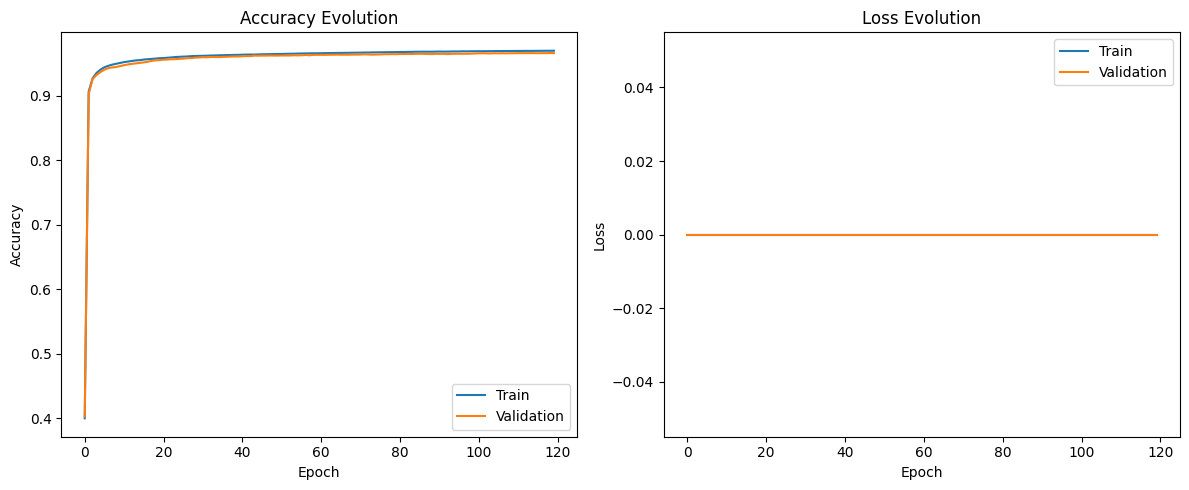

Test Accuracy = 96.29%

Model Performance Metrics:
------------------------------
Test Accuracy  = 96.29%
Test Precision = 0.9629
Test Recall    = 0.9629
Test F1 Score  = 0.9629


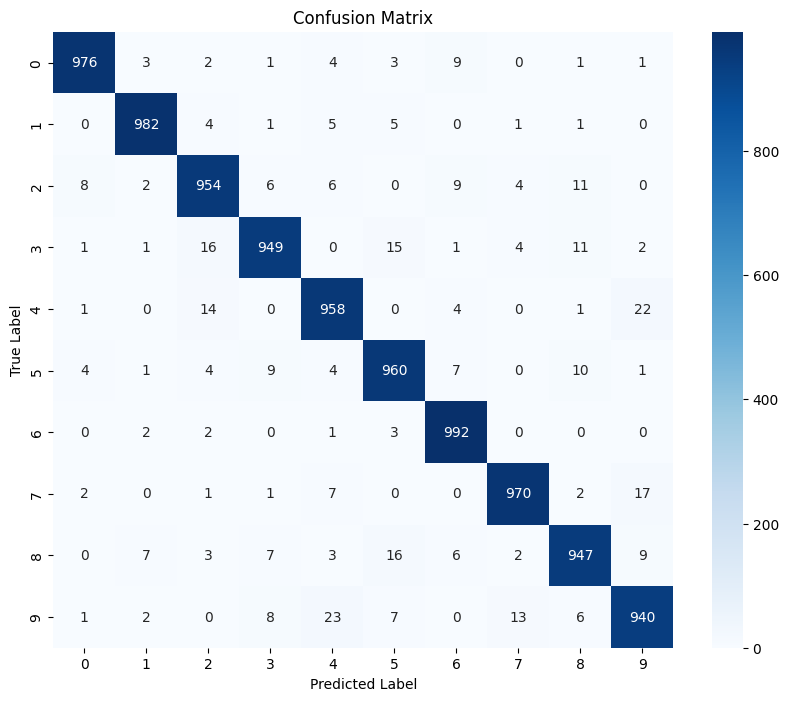

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


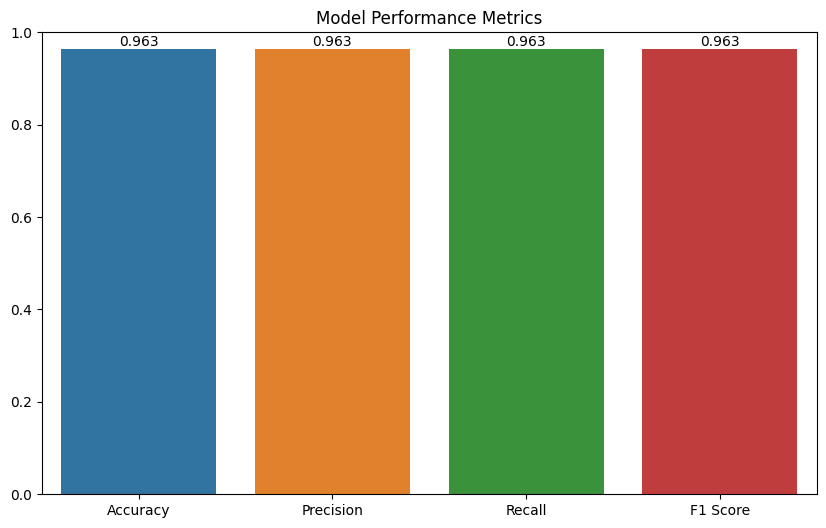

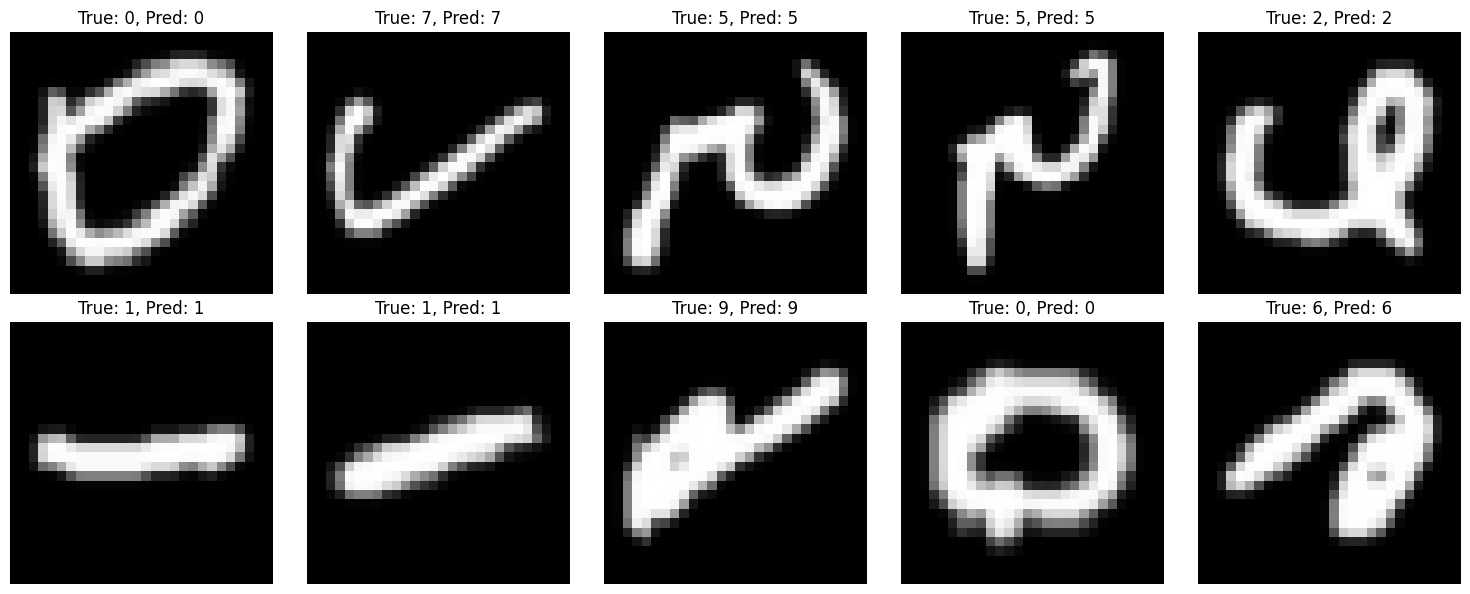

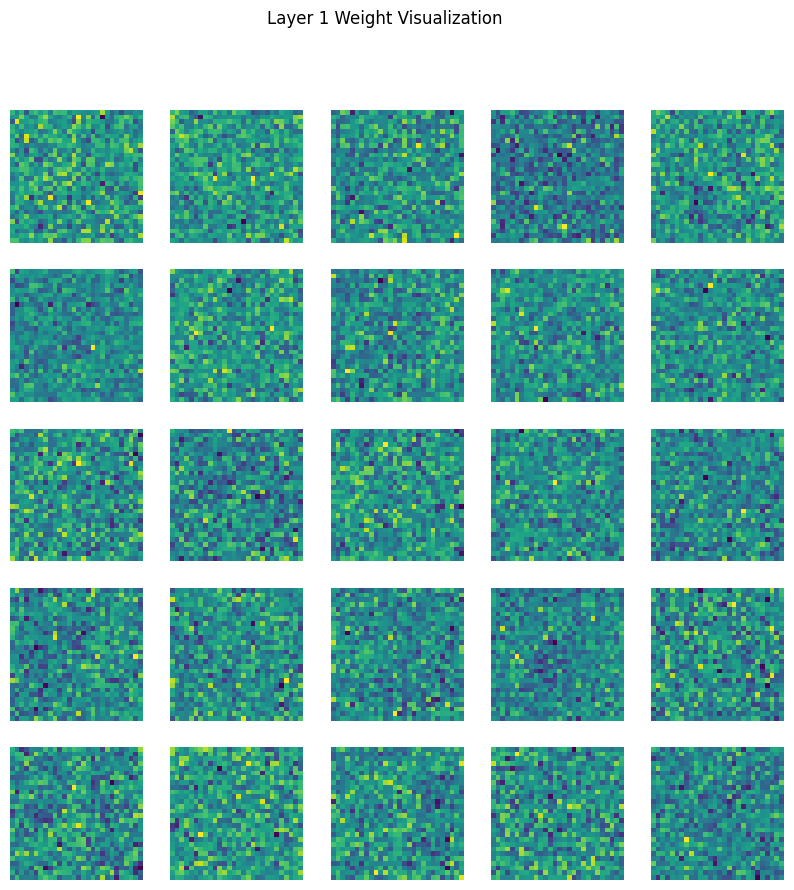

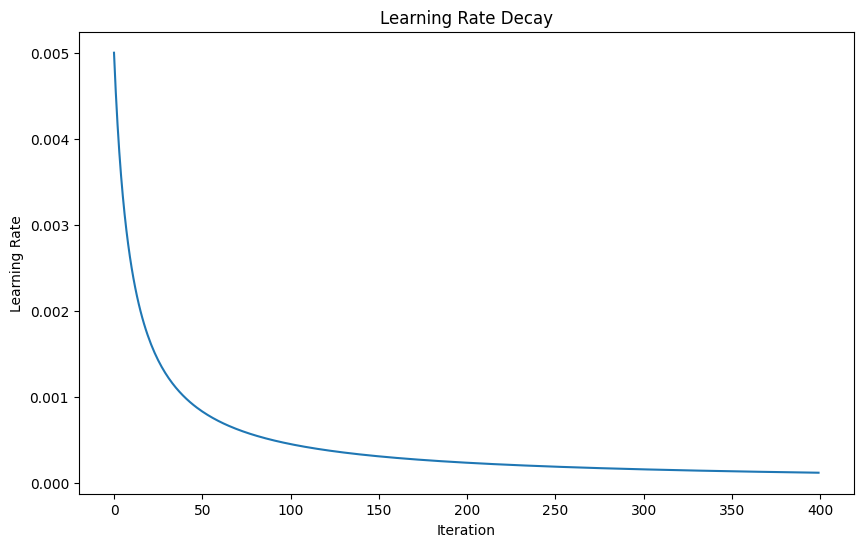

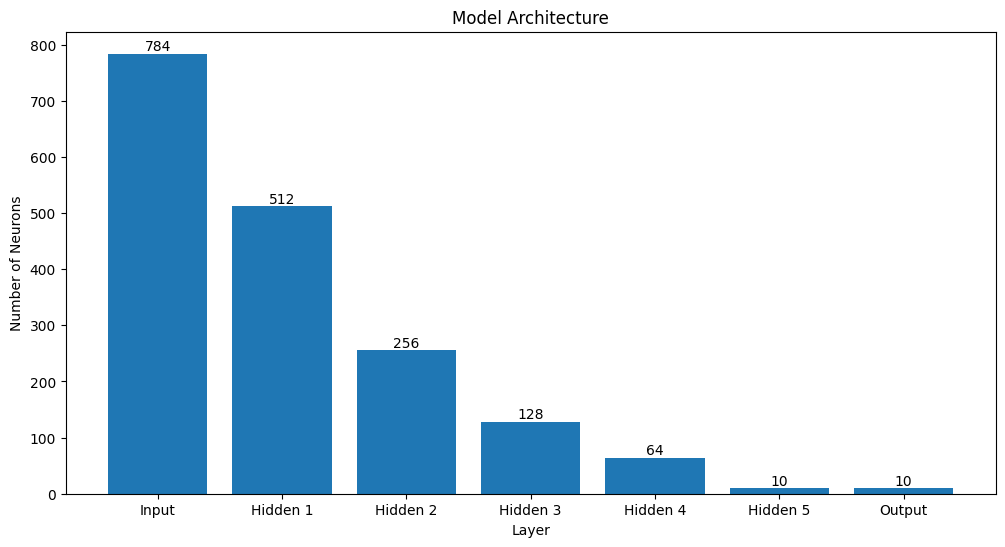


Total trainable parameters: 575160

Neural Network Architecture and Parameter Breakdown:
------------------------------------------------------------
Layer      Shape           Trainable Parameters      Activation     
------------------------------------------------------------
Input      (784,)          0                         -              
W1         (512, 784)      401408                    LeakyReLU      
b1         (512, 1)        512                                      
W2         (256, 512)      131072                    LeakyReLU      
b2         (256, 1)        256                                      
W3         (128, 256)      32768                     LeakyReLU      
b3         (128, 1)        128                                      
W4         (64, 128)       8192                      LeakyReLU      
b4         (64, 1)         64                                       
W5         (10, 64)        640                       LeakyReLU      
b5         (10, 1)         10

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load and preprocess data
data = pd.read_csv("/kaggle/input/emnist/emnist-mnist-train.csv")
data_np = data.to_numpy()
Y_train = data_np[:, 0]
X_train = data_np[:, 1:]

# Normalize the data
X_train = X_train / 255.0

# Shuffle the data
def shuffle_data(X, Y):
    permutation = np.random.permutation(X.shape[0])
    return X[permutation], Y[permutation]

X_train, Y_train = shuffle_data(X_train, Y_train)

# Split into training and validation sets
val_size = int(0.1 * X_train.shape[0])
X_val, Y_val = X_train[:val_size], Y_train[:val_size]
X_train, Y_train = X_train[val_size:], Y_train[val_size:]

# Transpose X_train and X_val
X_train = X_train.T
X_val = X_val.T

# Number of unique classes
class_labels = data.iloc[:, 0]
unique_classes = class_labels.unique()
num_classes = unique_classes.size
print(f"Number of unique classes: {num_classes}")
print(X_train.shape)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=Y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

def init_params(num_classes):
    W1 = np.random.randn(512, 784) * np.sqrt(2./784)
    b1 = np.zeros((512, 1))
    W2 = np.random.randn(256, 512) * np.sqrt(2./512)
    b2 = np.zeros((256, 1))
    W3 = np.random.randn(128, 256) * np.sqrt(2./256)
    b3 = np.zeros((128, 1))
    W4 = np.random.randn(64, 128) * np.sqrt(2./128)
    b4 = np.zeros((64, 1))
    W5 = np.random.randn(10, 64) * np.sqrt(2./64)
    b5 = np.zeros((10, 1))
    W6 = np.random.randn(num_classes, 10) * np.sqrt(2./10)
    b6 = np.zeros((num_classes, 1))
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6

def LeakyReLU(Z, alpha=0.01):
    return np.maximum(alpha * Z, Z)

def LeakyReLU_deriv(Z, alpha=0.01):
    dZ = np.ones_like(Z)
    dZ[Z < 0] = alpha
    return dZ

def softmax(Z):
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def one_hot(Y, num_classes):
    one_hot_Y = np.zeros((Y.size, num_classes))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def get_predictions(A):
    return np.argmax(A, axis=0)

def get_accuracy(predictions, labels):
    return np.mean(predictions == labels)

def dropout(A, keep_prob):
    D = np.random.rand(*A.shape) < keep_prob
    A *= D
    A /= keep_prob
    return A, D

def get_learning_rate(initial_lr, iteration, decay_rate=0.1):
    return initial_lr / (1 + decay_rate * iteration)

def forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, X, keep_prob=1.0, is_training=True):
    Z1 = W1.dot(X) + b1
    A1 = LeakyReLU(Z1)
    if is_training:
        A1, D1 = dropout(A1, keep_prob)
    Z2 = W2.dot(A1) + b2
    A2 = LeakyReLU(Z2)
    if is_training:
        A2, D2 = dropout(A2, keep_prob)
    Z3 = W3.dot(A2) + b3
    A3 = LeakyReLU(Z3)
    if is_training:
        A3, D3 = dropout(A3, keep_prob)
    Z4 = W4.dot(A3) + b4
    A4 = LeakyReLU(Z4)
    if is_training:
        A4, D4 = dropout(A4, keep_prob)
    Z5 = W5.dot(A4) + b5
    A5 = LeakyReLU(Z5)
    if is_training:
        A5, D5 = dropout(A5, keep_prob)
    Z6 = W6.dot(A5) + b6
    A6 = softmax(Z6)
    cache = (Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4, D4, Z5, A5, D5, Z6, A6) if is_training else (Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, Z6, A6)
    return A6, cache

def backward_prop(X, Y, cache, W1, W2, W3, W4, W5, W6, keep_prob, num_classes, lambd):
    m = Y.shape[0]
    (Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4, D4, Z5, A5, D5, Z6, A6) = cache
    
    one_hot_Y = one_hot(Y, num_classes)
    dZ6 = A6 - one_hot_Y
    dW6 = 1/m * dZ6.dot(A5.T) + (lambd/m) * W6
    db6 = 1/m * np.sum(dZ6, axis=1, keepdims=True)
    
    dA5 = W6.T.dot(dZ6)
    dA5 *= D5
    dA5 /= keep_prob
    dZ5 = dA5 * LeakyReLU_deriv(Z5)
    dW5 = 1/m * dZ5.dot(A4.T) + (lambd/m) * W5
    db5 = 1/m * np.sum(dZ5, axis=1, keepdims=True)
    
    dA4 = W5.T.dot(dZ5)
    dA4 *= D4
    dA4 /= keep_prob
    dZ4 = dA4 * LeakyReLU_deriv(Z4)
    dW4 = 1/m * dZ4.dot(A3.T) + (lambd/m) * W4
    db4 = 1/m * np.sum(dZ4, axis=1, keepdims=True)
    
    dA3 = W4.T.dot(dZ4)
    dA3 *= D3
    dA3 /= keep_prob
    dZ3 = dA3 * LeakyReLU_deriv(Z3)
    dW3 = 1/m * dZ3.dot(A2.T) + (lambd/m) * W3
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = W3.T.dot(dZ3)
    dA2 *= D2
    dA2 /= keep_prob
    dZ2 = dA2 * LeakyReLU_deriv(Z2)
    dW2 = 1/m * dZ2.dot(A1.T) + (lambd/m) * W2
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = W2.T.dot(dZ2)
    dA1 *= D1
    dA1 /= keep_prob
    dZ1 = dA1 * LeakyReLU_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T) + (lambd/m) * W1
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, dW6, db6

def gradient_descent(X_train, Y_train, X_val, Y_val, num_classes, 
                     initial_lr=0.005, iterations=400, batch_size=256, 
                     keep_prob=0.9, lambd=0.00005):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6 = init_params(num_classes)
    m = X_train.shape[1]
    
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[:, permutation]
        Y_train_shuffled = Y_train[permutation]

        for j in range(0, m, batch_size):
            end = j + batch_size
            X_batch = X_train_shuffled[:, j:end]
            Y_batch = Y_train_shuffled[j:end]

            A6, cache = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, X_batch, keep_prob)
            dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, dW6, db6 = backward_prop(X_batch, Y_batch, cache, W1, W2, W3, W4, W5, W6, keep_prob, num_classes, lambd)

            lr = get_learning_rate(initial_lr, i)
            W1 -= lr * dW1
            b1 -= lr * db1
            W2 -= lr * dW2
            b2 -= lr * db2
            W3 -= lr * dW3
            b3 -= lr * db3
            W4 -= lr * dW4
            b4 -= lr * db4
            W5 -= lr * dW5
            b5 -= lr * db5
            W6 -= lr * dW6
            b6 -= lr * db6

        if i % 10 == 0:
            train_predictions = get_predictions(forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, X_train, is_training=False)[0])
            val_predictions = get_predictions(forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, X_val, is_training=False)[0])
            train_accuracy = get_accuracy(train_predictions, Y_train)
            val_accuracy = get_accuracy(val_predictions, Y_val)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            
            # Calculate loss (you may need to implement a loss function)
            train_loss = 0  # Placeholder, implement actual loss calculation
            val_loss = 0    # Placeholder, implement actual loss calculation
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            
            print(f"Iteration {i}: Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")

    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, train_accuracies, val_accuracies, train_losses, val_losses

# Training the neural network
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, train_accuracies, val_accuracies, train_losses, val_losses = gradient_descent(
    X_train, Y_train, X_val, Y_val, num_classes, 
    initial_lr=0.005, iterations=1200,batch_size=256, 
    keep_prob=0.9, lambd=0.00005
)

# Accuracy and Loss Evolution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Load the test data
test_data = pd.read_csv('/kaggle/input/emnist/emnist-mnist-test.csv')
test_data_np = test_data.to_numpy()
Y_test = test_data_np[:, 0]
X_test = test_data_np[:, 1:] / 255.0
X_test = X_test.T

# Get predictions on the test set
test_predictions = get_predictions(forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, X_test, is_training=False)[0])
test_accuracy = get_accuracy(test_predictions, Y_test)
print(f"Test Accuracy = {test_accuracy * 100:.2f}%")

# Continuing from the previous code...

# Calculate metrics
test_accuracy = accuracy_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions, average='weighted')
test_recall = recall_score(Y_test, test_predictions, average='weighted')
test_f1 = f1_score(Y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(Y_test, test_predictions)

# Print metrics
print("\nModel Performance Metrics:")
print("-" * 30)
print(f"Test Accuracy  = {test_accuracy * 100:.2f}%")
print(f"Test Precision = {test_precision:.4f}")
print(f"Test Recall    = {test_recall:.4f}")
print(f"Test F1 Score  = {test_f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Performance Metrics Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [test_accuracy, test_precision, test_recall, test_f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
plt.show()

# Sample Predictions Visualization
def plot_sample_predictions(X, y_true, y_pred, n_samples=10):
    indices = np.random.choice(range(X.shape[1]), n_samples, replace=False)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for i, idx in enumerate(indices):
        img = X[:, idx].reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_sample_predictions(X_test, Y_test, test_predictions)

# Weight Visualizations
def plot_weights(W, layer_name):
    plt.figure(figsize=(10, 10))
    for i in range(min(25, W.shape[0])):
        plt.subplot(5, 5, i+1)
        plt.imshow(W[i].reshape(int(np.sqrt(W.shape[1])), -1), cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'{layer_name} Weight Visualization')
    plt.show()

plot_weights(W1, 'Layer 1')

# Learning Rate Decay Visualization
iterations = range(400)
learning_rates = [get_learning_rate(0.005, i) for i in iterations]

plt.figure(figsize=(10, 6))
plt.plot(iterations, learning_rates)
plt.title('Learning Rate Decay')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

# Model Architecture Summary
def count_parameters(W, b):
    return W.size + b.size

total_params = count_parameters(W1, b1) + count_parameters(W2, b2) + count_parameters(W3, b3) + \
               count_parameters(W4, b4) + count_parameters(W5, b5) + count_parameters(W6, b6)

layers = ['Input', 'Hidden 1', 'Hidden 2', 'Hidden 3', 'Hidden 4', 'Hidden 5', 'Output']
neurons = [784, 512, 256, 128, 64, 10, 10]

plt.figure(figsize=(12, 6))
plt.bar(layers, neurons)
plt.title('Model Architecture')
plt.xlabel('Layer')
plt.ylabel('Number of Neurons')
for i, v in enumerate(neurons):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

print(f"\nTotal trainable parameters: {total_params}")

# Print Neural Network Architecture and Parameter Breakdown
print("\nNeural Network Architecture and Parameter Breakdown:")
print("-" * 60)
print(f"{'Layer':<10} {'Shape':<15} {'Trainable Parameters':<25} {'Activation':<15}")
print("-" * 60)
print(f"{'Input':<10} {'(784,)':<15} {'0':<25} {'-':<15}")
print(f"{'W1':<10} {str(W1.shape):<15} {W1.size:<25} {'LeakyReLU':<15}")
print(f"{'b1':<10} {str(b1.shape):<15} {b1.size:<25} {'':<15}")
print(f"{'W2':<10} {str(W2.shape):<15} {W2.size:<25} {'LeakyReLU':<15}")
print(f"{'b2':<10} {str(b2.shape):<15} {b2.size:<25} {'':<15}")
print(f"{'W3':<10} {str(W3.shape):<15} {W3.size:<25} {'LeakyReLU':<15}")
print(f"{'b3':<10} {str(b3.shape):<15} {b3.size:<25} {'':<15}")
print(f"{'W4':<10} {str(W4.shape):<15} {W4.size:<25} {'LeakyReLU':<15}")
print(f"{'b4':<10} {str(b4.shape):<15} {b4.size:<25} {'':<15}")
print(f"{'W5':<10} {str(W5.shape):<15} {W5.size:<25} {'LeakyReLU':<15}")
print(f"{'b5':<10} {str(b5.shape):<15} {b5.size:<25} {'':<15}")
print(f"{'W6':<10} {str(W6.shape):<15} {W6.size:<25} {'Softmax':<15}")
print(f"{'b6':<10} {str(b6.shape):<15} {b6.size:<25} {'':<15}")
print("-" * 60)
print(f"{'Total':<10} {'':<15} {total_params:<25}")
print(f"\nTotal trainable parameters: {total_params}")
print(f"Total non-trainable parameters: 0")